# Trabalhando com Regressão Logística

Uma outra técnica de classificação muito utilizada é a Regressão Logística. A Regressão Logística é um modelo de classificação que utiliza uma função logística para realizar a classificação. A função logística é uma função que retorna um valor entre 0 e 1, que pode ser interpretado como uma probabilidade. A Regressão Logística utiliza a função logística para realizar a classificação, onde a probabilidade de uma classe é calculada a partir de uma combinação linear das features. A combinação linear é calculada a partir de uma equação, onde cada feature é multiplicada por um coeficiente e somada a um termo de interceptação. A equação é dada por:

$$\hat{y} = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n)}}$$

Onde $\hat{y}$ é a probabilidade de uma classe, $x_i$ é uma feature, $\beta_i$ é o coeficiente da feature e $\beta_0$ é o termo de interceptação. A partir da probabilidade, é possível realizar a classificação, onde a classe é escolhida a partir de um limiar. Por exemplo, se o limiar for 0.5, a classe será escolhida a partir da probabilidade, onde se a probabilidade for maior que 0.5, a classe será 1, caso contrário, a classe será 0.

Para mais informações sobre o funcionamento de uma regressão logística, recomendo a leitura do artigo [A Gentle Introduction to Logistic Regression for Machine Learning](https://machinelearningmastery.com/logistic-regression-for-machine-learning/).

O processo de modelagem é semelhante ao realizado anteriormente. Vamos seguir à partir da divisão dos dados em treino e teste.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
import logging
warnings.filterwarnings('ignore')
logging.disable(sys.maxsize)

### Carrregando os dados

In [2]:
import os
train = pd.read_csv(os.path.join('data', 'train.csv'))
test = pd.read_csv(os.path.join('data', 'test.csv'))

### Pré-Processando os dados

In [3]:
if 'Name' in train.columns:
    train = train.drop(['Name', 'PassengerId', 'Cabin'], axis=1)

if 'Name' in test.columns:
    test = test.drop(['Name', 'PassengerId', 'Cabin'], axis=1)

y = train['Transported']
X = train.drop('Transported', axis=1)

In [4]:
X.VIP = X.VIP.astype(bool)
test.VIP = test.VIP.astype(bool)

In [5]:
X = pd.get_dummies(X)
test = pd.get_dummies(test)
X.head()

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,True,False,True,False,False,False,True
1,24.0,False,109.0,9.0,25.0,549.0,44.0,True,False,False,True,False,False,False,True
2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,True,False,True,False,False,False,True
3,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,True,False,True,False,False,False,True
4,16.0,False,303.0,70.0,151.0,565.0,2.0,True,False,False,True,False,False,False,True


In [6]:
X = X.fillna(0)
test = test.fillna(0)
y = y.fillna(0)

### Regressão Logística

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state=0)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.7786083956296722

In [9]:
confusion_matrix(y_test, y_pred)

array([[652, 211],
       [174, 702]])

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.79      0.76      0.77       863
        True       0.77      0.80      0.78       876

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



In [11]:
feature_importances = pd.DataFrame(model.coef_[0], index = x_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
HomePlanet_Europa,1.151148
CryoSleep_True,0.975333
Destination_55 Cancri e,0.592682
HomePlanet_Mars,0.076416
VIP,0.040846
Destination_PSO J318.5-22,0.016549
FoodCourt,0.000552
ShoppingMall,0.000537
RoomService,-0.001499
VRDeck,-0.001751


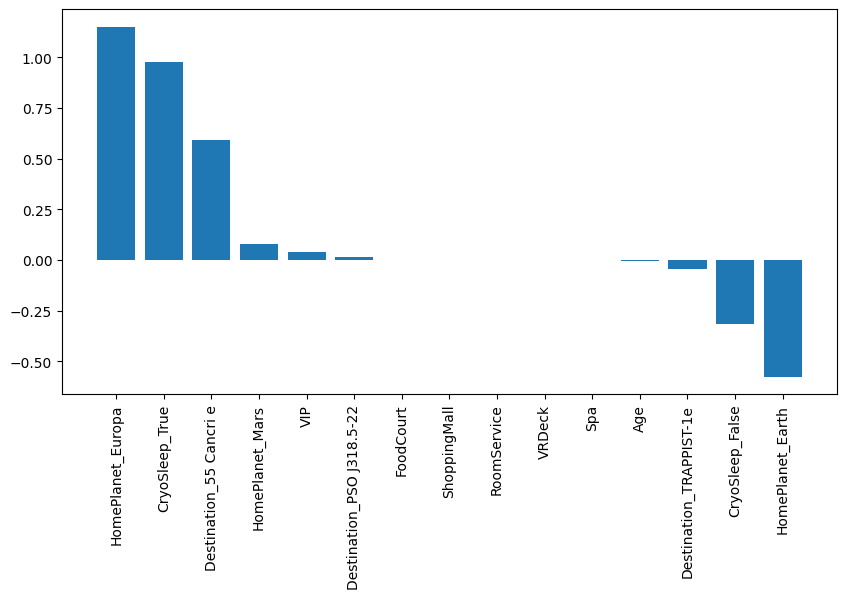

In [12]:
plt.figure(figsize=(10, 5))
plt.bar(feature_importances.index, feature_importances['importance'])
plt.xticks(rotation=90)
plt.show()

Como podemos ver, para o problema em questão, o modelo de regressão logística funciona, a princípio, com uma acurácia melhor que o modelo de árvore de decisão. Com um modelo simples, obtivemos uma acurácia de 77.8%, enquanto após realizarmos diversas otimizações no modelo de árvore, obtivemos 77.7% de acurácia. Se trata praticamente do mesmo resultado, porém utilizando um modelo mais simples.

O modelo de regressão logística, por utilizar uma função logística, é um modelo linear. Assim, como ocorre no modelo de Random Forest, também consegue fornecer as features mais importantes para o modelo, permitindo otimizá-lo para rodar um modelo cuja acurácia pode ser ainda melhor. A importância das features se trata do coeficiente da feature, que é o quanto a feature influencia na classificação.

### Como melhorar o modelo?

1. Verificar e tratar dados ausentes ou nulos: Dados ausentes ou nulos podem levar a resultados imprecisos e prejudicar a precisão do modelo. Portanto, é importante verificar e tratar esses dados antes de treinar o modelo.
2. Seleção de recursos (feature selection): Nem todas as características podem ser importantes para a previsão do modelo. A seleção de recursos ajuda a escolher as características mais relevantes para a previsão, o que pode ajudar a melhorar a precisão do modelo.
3. Engenharia de características (feature engineering): Engenharia de características pode envolver a criação de novas características com base nas características existentes. Isso pode ajudar a extrair informações relevantes dos dados e melhorar a precisão do modelo.
4. Normalização dos dados: Normalizar os dados pode ajudar a melhorar a precisão do modelo, garantindo que as características tenham escalas comparáveis.
5. Regularização: A regularização pode ajudar a reduzir o overfitting e melhorar a precisão do modelo. A regularização pode ser alcançada através de técnicas como L1, L2 ou ElasticNet.
6. Ajuste de hiperparâmetros: Os hiperparâmetros do modelo podem ser ajustados para obter uma precisão melhor. Os hiperparâmetros são ajustados usando técnicas como a validação cruzada.
7. Utilizar técnicas de ensemble: As técnicas de ensemble como o bootstrap aggregating (Bagging) ou a boosting podem melhorar a precisão do modelo de regressão logística, combinando vários modelos de regressão logística em conjunto.
8. Tratamento de dados desbalanceados: Se os dados estiverem desbalanceados (um dos rótulos de classe é muito menos frequente do que o outro), técnicas como oversampling ou undersampling podem ajudar a melhorar a precisão do modelo.

O mais comum para melhorar um modelo de regressão logística é a *Feature Selection* e *Feature Engineering*.

### Feature Selection

Temos várias ferramentas disponíveis no `scikit-learn` para realizar Feature Selection e melhorar o modelo.

1. Seleção de recursos baseada em modelo (Model-based Feature Selection): A seleção de recursos baseada em modelo usa um modelo de aprendizado de máquina para selecionar as características mais importantes. O Scikit-learn tem a classe `SelectFromModel` para fazer isso.

```python
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

# Seleciona as melhores características usando Logistic Regression
lr = LogisticRegression()
selector = SelectFromModel(lr)
X_new = selector.fit_transform(X, y)
```

2. Seleção de recursos baseada em correlação (Correlation-based Feature Selection): A seleção de recursos baseada em correlação calcula a correlação entre as características e o rótulo e seleciona as características com as correlações mais altas. O Scikit-learn tem a classe `SelectKBest` para fazer isso.

```python
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Seleciona as melhores 3 características baseadas em correlação com o rótulo
selector = SelectKBest(f_regression, k=3)
X_new = selector.fit_transform(X, y)
```

### Feature Engineering

Assim como em Feature Selection, também temos várias ferramentas disponíveis no `scikit-learn` para realizar Feature Engineering e melhorar o modelo.

1. Normalização (Normalization): Normalização ajuda a colocar as características na mesma escala. O Scikit-learn tem a classe `StandardScaler` para fazer isso.

```python
from sklearn.preprocessing import StandardScaler

# Normaliza as características
scaler = StandardScaler()
X_new = scaler.fit_transform(X)
```

2. Criação de novas características (Feature Creation): Novas características podem ser criadas a partir de características existentes. O Scikit-learn tem a classe `PolynomialFeatures` para fazer isso.

```python
from sklearn.preprocessing import PolynomialFeatures

# Cria características polinomiais
poly = PolynomialFeatures(degree=2)
X_new = poly.fit_transform(X)
```

3. Redução de dimensionalidade (Dimensionality Reduction): A redução de dimensionalidade ajuda a reduzir o número de características, mantendo a maioria das informações. O Scikit-learn tem a classe `PCA` para fazer isso.

```python
from sklearn.decomposition import PCA

# Reduz a dimensionalidade para 3 características
pca = PCA(n_components=3)
X_new = pca.fit_transform(X)
```

4. Transformação de características (Feature Transformation): A transformação de características altera a distribuição das características. O Scikit-learn tem a classe `PowerTransformer` para fazer isso.

```python
from sklearn.preprocessing import PowerTransformer

# Transforma as características usando PowerTransformer
pt = PowerTransformer()
X_new = pt.fit_transform(X)
```

Para simplificação, vamos utilizar uma seleção de features baseadas em modelo, e uma feature engineering baseada em normalização.

In [56]:
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

# Seleciona as melhores características usando Random Forest
lr = LogisticRegression()
selector = SelectFromModel(lr)
X_new = selector.fit_transform(X, y)

# # Seleciona as melhores caracteristicas usando selectkbest
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_regression

selector = SelectKBest(f_regression, k=5)
X_new = selector.fit_transform(X, y)

# Mostra as características selecionadas
X_new = pd.DataFrame(X_new, columns=X.columns[selector.get_support()])
X_new.head()

,RoomService,Spa,VRDeck,CryoSleep_False,CryoSleep_True
0,0.0,0.0,0.0,1.0,0.0
1,109.0,549.0,44.0,1.0,0.0
2,43.0,6715.0,49.0,1.0,0.0
3,0.0,3329.0,193.0,1.0,0.0
4,303.0,565.0,2.0,1.0,0.0


In [50]:
# Normaliza as características
scaler = StandardScaler()
X_new = scaler.fit_transform(X)

# Divide os dados em treino e teste
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_new, y, test_size=0.2, random_state=0)

In [51]:
model = LogisticRegression()
model.fit(X_train_, y_train_)

LogisticRegression()

In [52]:
y_pred_ = model.predict(X_test_)
accuracy_score(y_test_, y_pred_)

0.7837837837837838